# <span style="color:black"> Esercitazioni - lezione 2 </span>

## <span style="color:black"> Esercizio 02.1 </span>

Si è valutato l'integrale monodimensionale 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
con metodi Monte Carlo tramite campionamento di punti distribuiti uniformemente nell'intervallo $[0,1)$ . Il risultato è presentato nel grafico sottostante.

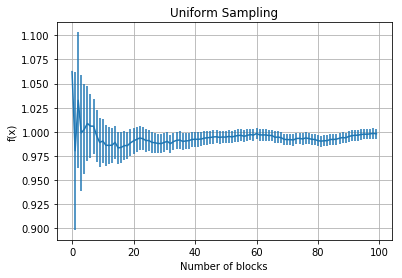

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

x1, f1, error1 = np.loadtxt('Es02.1.1.res', usecols=(0,1,2), unpack='true')

plt.errorbar(x1, f1, yerr=error1)
plt.xlabel("Number of blocks")
plt.ylabel("f(x)")
plt.title("Uniform Sampling")
plt.grid()
plt.show()

Si è poi utilizzata una funzione del tipo $f(x)=2-2x$ per il campionamento dei punti. Utilizzando il metodo dell'importance sampling, se ne è calcolata la cumulativa
$$F(x) = \int_0^x (2-2x') \mathrm d x'=2x-x^2$$
di cui è immediato verificare la normalizzazione 
$$\bigl[F(x)\bigr]_0^1=\bigl[2x-x^2\bigr]_0^1=1$$
Ora, calcolando $F^{-1}(x)$ nell'intervallo $[0,1)$ in cui $f(x)$ è biunivoca si ottiene $$y=F^{-1}(x)=1-\sqrt{1-x}$$
da cui è possibile campionare i punti nell'intervallo $[0,1)$ secondo la distribuzione desiderata. E' mostrato in figura l'andamento della funzione scelta.

<img src="graph2.png">

Nei grafici sottostanti sono rappresentati rispettivamente il confronto tra i due metodi di *uniform sampling* e *importance sampling*, e il dettaglio dei risultati per il secondo metodo. E' evidente anche ad occhio la convergenza decisamente più rapida del secondo metodo, il quale già con 30 blocchi presenta con buona confidenza il risultato atteso.

N.B. Si ricorda che per entrambi i metodi i risultati sono sempre stati ottenuti utilizzando il metodo dei blocchi implementato con 100 blocchi e 100 lanci per blocco.

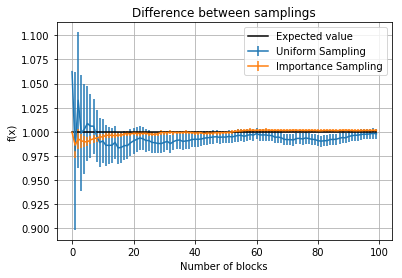

In [4]:
x1, f1, error1 = np.loadtxt('Es02.1.1.res', usecols=(0,1,2), unpack='true')

plt.errorbar(x1, f1, yerr=error1, label='Uniform Sampling')
x2, f2, error2 = np.loadtxt('Es02.1.2.res', usecols=(0,1,2), unpack='true')
plt.errorbar(x2, f2, yerr=error2, label='Importance Sampling')
plt.xlabel("Number of blocks")
plt.ylabel("f(x)")
plt.title("Difference between samplings")
plt.plot(1-x1+x1, label='Expected value', color='k')
plt.legend()
plt.grid()
plt.show()

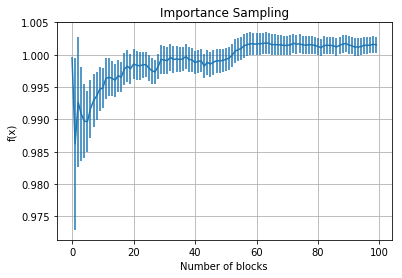

In [5]:
x2, f2, error2 = np.loadtxt('Es02.1.2.res', usecols=(0,1,2), unpack='true')
plt.errorbar(x2, f2, yerr=error2)
plt.xlabel("Number of blocks")
plt.ylabel("f(x)")
plt.title("Importance Sampling")
plt.grid()
plt.show()

## <span style="color:black"> Esercizio 02.2 </span>

Simulazione di un random walk 3-dimensionale su un reticolo.

1. E' stato simulato un random walk su un reticolo discreto di lato $a=1$; per eseguire ogni *passo* si è generato un numero casuale $x\in [-1.5,1.5)$. Si è pertanto ottenuto il verso guardando il segno di $x$, e la direzione guardandone il modulo. Questo ha permesso di utilizzare la generazione di un unico numero casuale e soprattutto di avere, nel caso peggiore, solamente 4 controlli per individuare il passo reticolare da compiere.

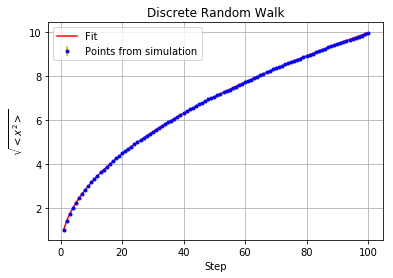

Optimzed parameter k = [0.99818239]
Parameter uncertainty = [0.00020858]


In [6]:
from scipy.optimize import curve_fit

x1, f1, error1 = np.loadtxt('Es02.2.1.res', usecols=(0,1,2), unpack='true')

plt.errorbar(x1, f1, yerr=error1, fmt='b.', ecolor='y', label='Points from simulation')

def f(x,a):
    return a*np.sqrt(x)

p_opt, p_cov = curve_fit(f, x1, f1, bounds=([0],[10]))
y_fit = f(x1,p_opt[0])
plt.plot(x1,y_fit, 'r-', label='Fit') # plotting fitted function

plt.xlabel("Step")
plt.ylabel(r'$\sqrt{<x^2>}$')
plt.title("Discrete Random Walk")
plt.legend()
plt.grid()
plt.show()

print("Optimzed parameter k =",p_opt)
print("Parameter uncertainty =",np.sqrt(np.diagonal(p_cov)))

Si noti che l'errore, molto piccolo, è stato calcolato conn il metodo dei blocchi unito alla formula della propagazione degli errori.
Nel grafico sono stati fittati i punti con una funzione del tipo $f(x)=A\sqrt x$. Questo fit evidenzia il comportamento diffusivo del sistema simulato.

Si è poi simulato un random walk nel continuo, ovvero mantenendo fisso il passo $a=1$ ma ottenendo la direzione generando casualmente un angolo solido. In particolare essendo $d\Omega=sin\theta d \theta d \phi$, allora l'angolo $\phi$ è stato generato casualmente tra $0$ e $2\pi$, mentre per $\theta$ si è proceduto come segue: innanzitutto si è calcolata la normalizzazione della probabilità
$$\int_0^\pi sin\theta d\theta = 2 \Rightarrow P(\theta)=\frac{1}{2}sin(\theta)$$
A questo punto se ne è calcolata la cumulativa
$$F(\theta)=\int_0^\theta \frac{1}{2}sin\theta'd\theta'=\frac{1}{2}\left(1-cos\theta\right) $$
e chiamando $F(\theta)=y$ se ne può calcolare l'inversa: $\theta=arcos(1-2y)$ con $y$ generato uniformemente nell'intervallo [0,1). A questo punto, ottenuti $\theta$ e $\phi$ distribuiti uniformemente lungo l'angolo solido, sono state ricavate le coordinate del nuovo punto a partire dal punto precedente utilizzando le relazioni per le coordinate sferiche:
$$\begin{cases}
  x = rsin\theta sin\phi \\
  y = rsin\theta sin\phi\\
  z = rcos\theta
\end{cases}$$

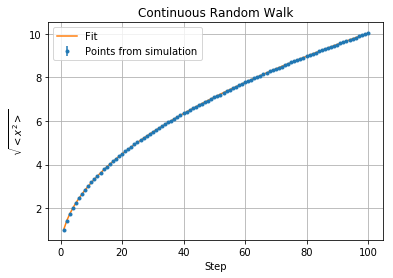

Optimzed parameter k = [1.00255921]
Parameter uncertainty = [0.00014134]


In [7]:
x1, f1, error1 = np.loadtxt('Es02.2.2.res', usecols=(0,1,2), unpack='true')

plt.errorbar(x1, f1, yerr=error1, fmt='.', label='Points from simulation')

def f(x,a):
    return a*np.sqrt(x)

p_opt, p_cov = curve_fit(f, x1, f1, bounds=([0],[10]))
y_fit = f(x1,p_opt[0])
plt.plot(x1,y_fit, label='Fit') # plotting fitted function

plt.xlabel("Step")
plt.ylabel(r'$\sqrt{<x^2>}$')
plt.title("Continuous Random Walk")
plt.legend()
plt.grid()
plt.show()

print("Optimzed parameter k =",p_opt)
print("Parameter uncertainty =",np.sqrt(np.diagonal(p_cov)))

I risultati sono riportati nel grafico e indicano di nuovo un comportamento diffusivo. In questo caso la costante di duffusione è compatibile (anche se leggermente maggiore) rispetto che al caso discreto. 